In [186]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
import warnings
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score , recall_score,precision_recall_curve,roc_auc_score,roc_curve
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

데이터로드
데이터 전처리
학습
평가
를 수행하여 모델의 평가 점수를 최대한 올려주시오


#피처 설명
* age
* sex
* cp : chest pain type (4 values)
* trestbps : resting blood pressure 혈압
* chol : serum cholestoral in mg/dl 콜레스테롤
* fbs : fasting blood sugar > 120 mg/dl 혈당
* restecg : resting electrocardiographic results (values 0,1,2) 심전도 결과
* thalach : maximum heart rate achieved 최대심박수
* exang : exercise induced angina 운동유발성 협심증
* oldpeak = ST depression induced by exercise relative to rest 우울증? ST 감소?
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy 형광투시법 결과
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 결함?
* target : 0 = no disease and 1 = disease.

In [187]:
df=pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [188]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [189]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [190]:
df['age'].mean()

54.43414634146342

In [191]:
df['age'].median()

56.0

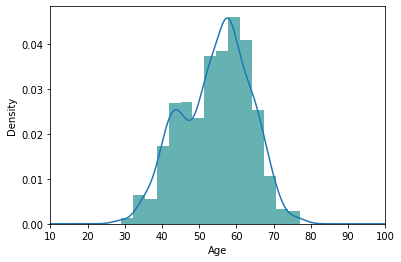

In [192]:
ax = df["age"].hist(bins=15, density=True, color='teal', alpha=0.6)
df["age"].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(10,100)
plt.show()

In [193]:
df.fbs.unique()

array([0, 1])

* age
* sex
* cp : chest pain type (4 values)
* trestbps : resting blood pressure 혈압
* chol : serum cholestoral in mg/dl 콜레스테롤
* fbs : fasting blood sugar > 120 mg/dl 혈당
* restecg : resting electrocardiographic results (values 0,1,2) 심전도 결과
* thalach : maximum heart rate achieved 최대심박수
* exang : exercise induced angina 운동유발성 협심증
* oldpeak = ST depression induced by exercise relative to rest 우울증? ST 감소?
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy 형광투시법 결과
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 결함?
* target : 0 = no disease and 1 = disease.

In [194]:
training=pd.get_dummies(df, columns=["sex","cp","restecg",'exang','slope','ca','thal'])
training

,age,trestbps,chol,fbs,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,0,168,1.0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,1,155,3.1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,0,125,2.6,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,0,161,0.0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,1,106,1.9,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,0,164,0.0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,0,141,2.8,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,0,118,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,0,159,0.0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [195]:
training.drop(['sex_1','exang_1'],axis=1,inplace=True)
training

,age,trestbps,chol,fbs,thalach,oldpeak,target,sex_0,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exang_0,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,0,168,1.0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,1,155,3.1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,0,125,2.6,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,0,161,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,1,106,1.9,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,0,164,0.0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,0,141,2.8,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,0,118,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,0,159,0.0,1,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


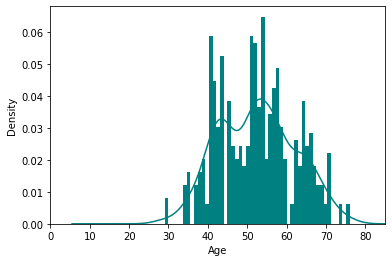

In [196]:
pred_age=training[['age','target']]
pred_age_d=pred_age[pred_age['target']==1]
ax=pred_age_d['age'].hist(bins=50, density=True, color='teal')
pred_age_d['age'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(0,85)
plt.show()

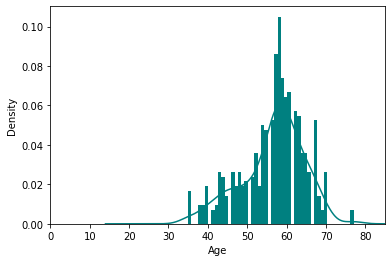

In [197]:
pred_age_nd=pred_age[pred_age['target']==0]
ax=pred_age_nd['age'].hist(bins=50, density=True, stacked=True, color='teal')
pred_age_nd['age'].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(0,85)
plt.show()

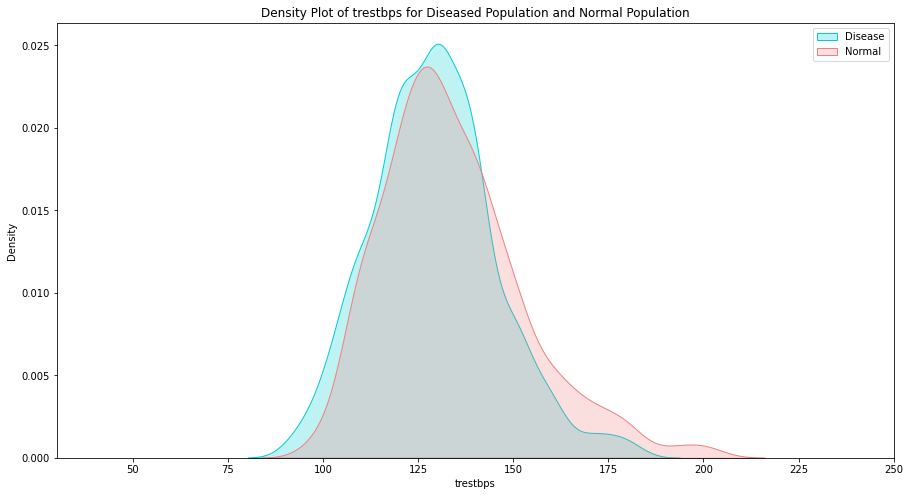

In [198]:

# 혈압
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["trestbps"][training.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(training["trestbps"][training.target == 0], color="lightcoral", shade=True)
plt.legend(['Disease', 'Normal'])
plt.title('Density Plot of trestbps for Diseased Population and Normal Population')
ax.set(xlabel='trestbps')
plt.xlim(30,250)
plt.show()

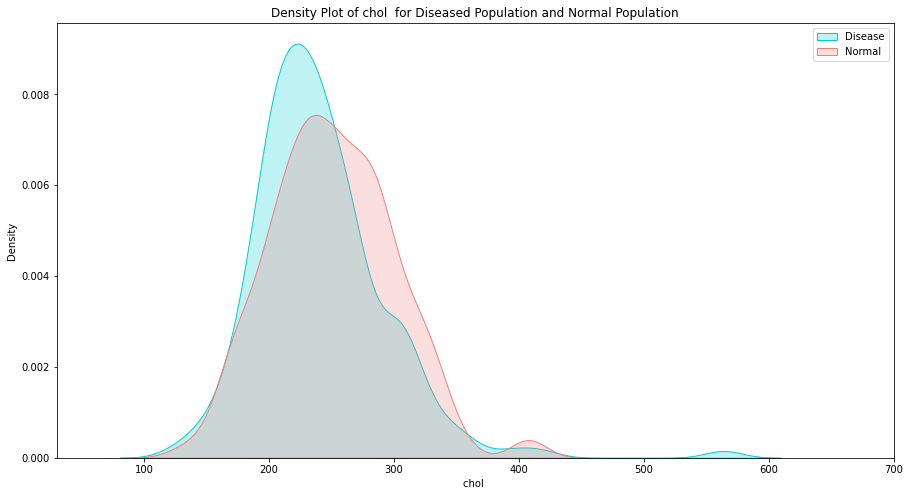

In [199]:
# 콜레스테롤
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["chol"][training.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(training["chol"][training.target == 0], color="lightcoral", shade=True)
plt.legend(['Disease', 'Normal'])
plt.title('Density Plot of chol  for Diseased Population and Normal Population')
ax.set(xlabel='chol ')
plt.xlim(30,700)
plt.show()

* age
* sex
* cp : chest pain type (4 values)
* trestbps : resting blood pressure 혈압
* chol : serum cholestoral in mg/dl 콜레스테롤
* fbs : fasting blood sugar > 120 mg/dl 혈당
* restecg : resting electrocardiographic results (values 0,1,2) 심전도 결과
* thalach : maximum heart rate achieved 최대심박수
* exang : exercise induced angina 운동유발성 협심증
* oldpeak = ST depression induced by exercise relative to rest 우울증? ST 감소?
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy 형광투시법 결과
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 결함?
* target : 0 = no disease and 1 = disease.

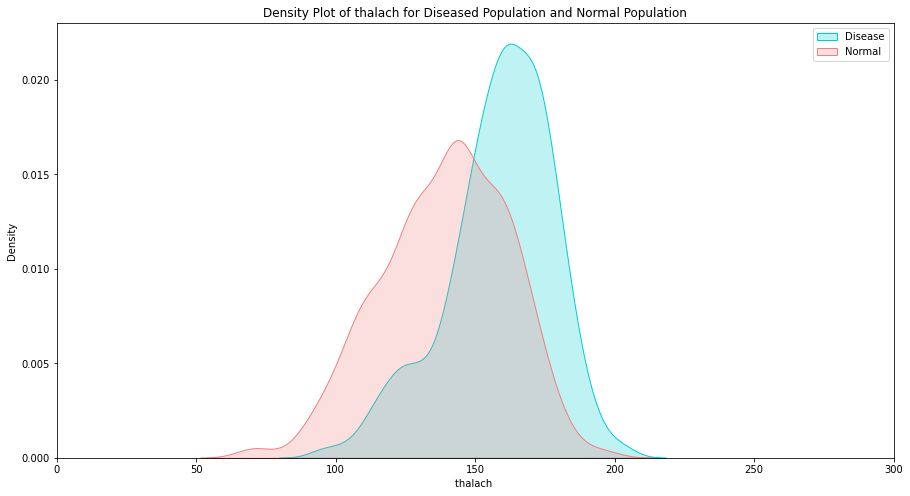

In [200]:
# 최대심박수
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["thalach"][training.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(training["thalach"][training.target == 0], color="lightcoral", shade=True)
plt.legend(['Disease', 'Normal'])
plt.title('Density Plot of thalach for Diseased Population and Normal Population')
ax.set(xlabel='thalach ')
plt.xlim(0,300)
plt.show()

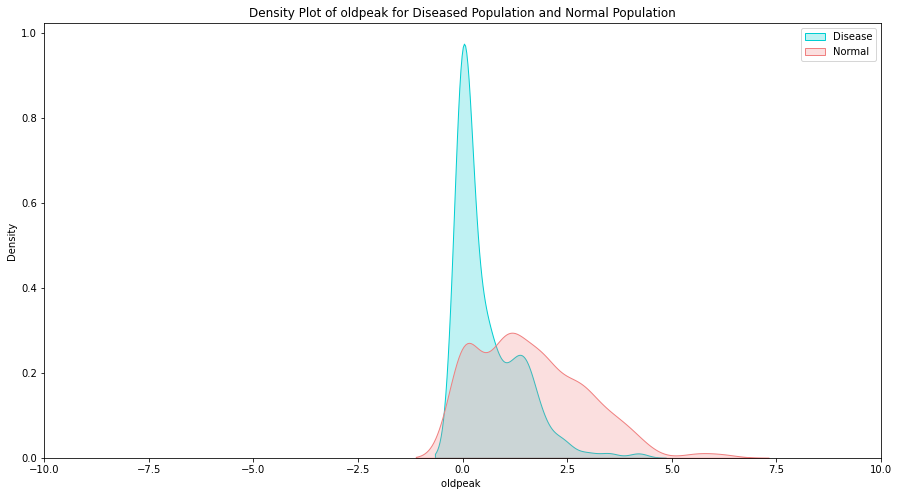

In [201]:
# 우울증감소?
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["oldpeak"][training.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(training["oldpeak"][training.target == 0], color="lightcoral", shade=True)
plt.legend(['Disease', 'Normal'])
plt.title('Density Plot of oldpeak for Diseased Population and Normal Population')
ax.set(xlabel='oldpeak ')
plt.xlim(-10,10)
plt.show()

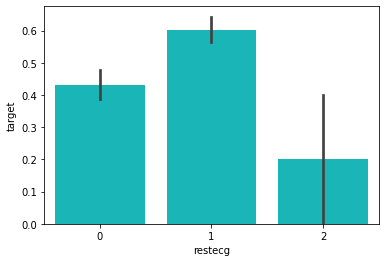

In [202]:

# Restecg 심전도결과
warnings.simplefilter(action='ignore')#워닝 안뜨게 설정

sns.barplot('restecg', 'target', data=df, color="darkturquoise")
plt.show()

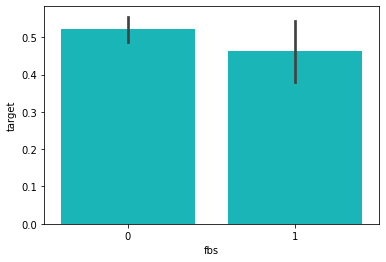

In [203]:
# fbs 혈당당 1 >120
sns.barplot('fbs', 'target', data=df, color="darkturquoise")
plt.show()

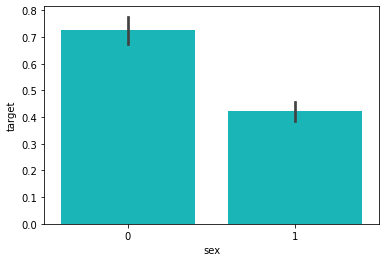

In [204]:
# 성별
sns.barplot('sex', 'target', data=df, color="darkturquoise")
plt.show()

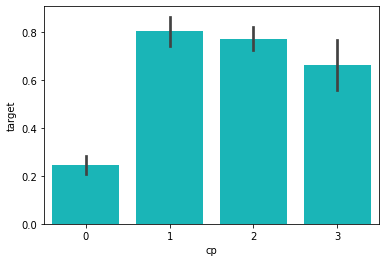

In [205]:
# cp 가슴 통증
sns.barplot('cp', 'target', data=df, color="darkturquoise")
plt.show()

* age
* sex
* cp : chest pain type (4 values)
* trestbps : resting blood pressure 혈압
* chol : serum cholestoral in mg/dl 콜레스테롤
* fbs : fasting blood sugar > 120 mg/dl 혈당
* restecg : resting electrocardiographic results (values 0,1,2) 심전도 결과
* thalach : maximum heart rate achieved 최대심박수
* exang : exercise induced angina 운동유발성 협심증
* oldpeak = ST depression induced by exercise relative to rest 우울증? ST 감소?
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy 형광투시법 결과
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 결함?
* target : 0 = no disease and 1 = disease.

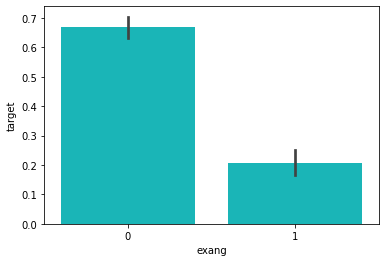

In [206]:
# exang 운동유발성 협심증
sns.barplot('exang', 'target', data=df, color="darkturquoise")
plt.show()


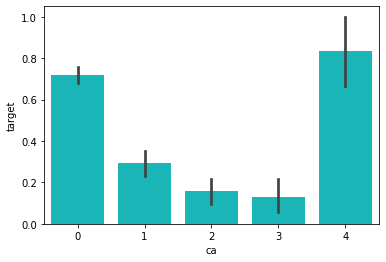

In [207]:
# ca 형광투시법결과
sns.barplot('ca', 'target', data=df, color="darkturquoise")
plt.show()

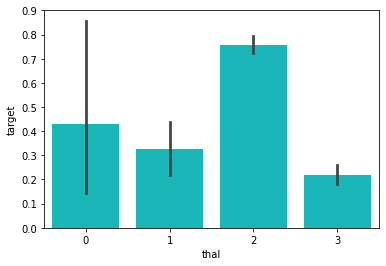

In [208]:
# thal reversable defect
sns.barplot('thal', 'target', data=df, color="darkturquoise")
plt.show()

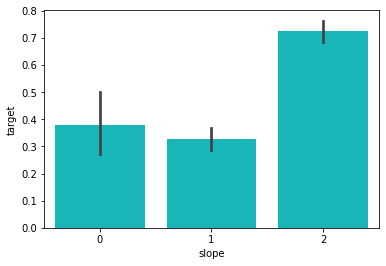

In [209]:
# slope ST segment
sns.barplot('slope', 'target', data=df, color="darkturquoise")
plt.show()

In [210]:
cols=['age','trestbps','chol','fbs','thalach','oldpeak','sex_0','cp_1','cp_2','cp_3','restecg_0','restecg_1','exang_0','slope_0','slope_2','ca_0','ca_1','ca_2','ca_4','thal_0','thal_1','thal_2']
x_data = training[cols]
x_data

,age,trestbps,chol,fbs,thalach,oldpeak,sex_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,exang_0,slope_0,slope_2,ca_0,ca_1,ca_2,ca_4,thal_0,thal_1,thal_2
0,52,125,212,0,168,1.0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0
1,53,140,203,1,155,3.1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,70,145,174,0,125,2.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
3,61,148,203,0,161,0.0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0
4,62,138,294,1,106,1.9,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,0,164,0.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1021,60,125,258,0,141,2.8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1022,47,110,275,0,118,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1023,50,110,254,0,159,0.0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1


* age
* sex
* cp : chest pain type (4 values)
* trestbps : resting blood pressure 혈압
* chol : serum cholestoral in mg/dl 콜레스테롤
* fbs : fasting blood sugar > 120 mg/dl 혈당
* restecg : resting electrocardiographic results (values 0,1,2) 심전도 결과
* thalach : maximum heart rate achieved 최대심박수
* exang : exercise induced angina 운동유발성 협심증
* oldpeak = ST depression induced by exercise relative to rest 우울증? ST 감소?
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy 형광투시법 결과
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 결함?
* target : 0 = no disease and 1 = disease.

In [211]:
y_data = training[["target"]]
y_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [212]:
X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()


dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))


rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))


lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))


1.0
1.0
0.8682926829268293


In [213]:
def exec_kfold(clf, folds=5):
    
    kfold = KFold(n_splits=folds)
    scores = []
    
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(x_data)):
        X_train, X_test = x_data.values[train_index], x_data.values[test_index]
        y_train, y_test = y_data.values[train_index], y_data.values[test_index]
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

exec_kfold(dt_clf , folds=5) 
exec_kfold(rf_clf , folds=5) 

교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 0.9854
교차 검증 4 정확도: 0.9854
평균 정확도: 0.9941
교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 0.9854
교차 검증 4 정확도: 0.9854
평균 정확도: 0.9941


In [214]:
scores = cross_val_score(dt_clf, x_data , y_data , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 0.9854
교차 검증 3 정확도: 0.9854
교차 검증 4 정확도: 0.9854
평균 정확도: 0.9912


In [215]:
scores = cross_val_score(rf_clf, x_data , y_data , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 0.9854
교차 검증 4 정확도: 0.9854
평균 정확도: 0.9941


In [216]:
parameters = {'max_depth':[12,13,14,15,16,17,18,19,10],
             'min_samples_split':[1,2,3,4,5,6], 'min_samples_leaf':[1,5,0,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_


dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9732
테스트 세트에서의 DecisionTreeClassifier 정확도 : 1.0000


In [217]:
print(pd.Series(y_test.values.flatten()).value_counts())# flatten 1차원 배열로 만들어줌
print(pd.Series(dpredictions).value_counts())
confusion_matrix(y_test , dpredictions)

1    108
0     97
dtype: int64
1    108
0     97
dtype: int64


array([[ 97,   0],
       [  0, 108]])

In [218]:
print(precision_score(y_test, dpredictions, average='micro'))
print(recall_score(y_test, dpredictions, average='micro'))

1.0
1.0


In [219]:
pred_proba = lr_clf.predict_proba(X_test) # 확률 표시
pred  = lr_clf.predict(X_test) # 답

In [222]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [223]:
custom_threshold = 0.5


pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) # 바이나리저 객체 1일확률을 fit함
custom_predict = binarizer.transform(pred_proba_1) # 변환 

get_clf_eval(y_test, custom_predict) # 정답,예측값

오차 행렬
[[81 16]
 [11 97]]
정확도: 0.8683, 정밀도: 0.8584, 재현율: 0.8981


In [224]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[ 77  20]
 [  7 101]]
정확도: 0.8683, 정밀도: 0.8347, 재현율: 0.9352


In [225]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.54, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[ 77  20]
 [  7 101]]
정확도: 0.8683, 정밀도: 0.8347, 재현율: 0.9352
임곗값: 0.45
오차 행렬
[[79 18]
 [11 97]]
정확도: 0.8585, 정밀도: 0.8435, 재현율: 0.8981
임곗값: 0.54
오차 행렬
[[83 14]
 [13 95]]
정확도: 0.8683, 정밀도: 0.8716, 재현율: 0.8796
임곗값: 0.55
오차 행렬
[[83 14]
 [13 95]]
정확도: 0.8683, 정밀도: 0.8716, 재현율: 0.8796
임곗값: 0.6
오차 행렬
[[85 12]
 [17 91]]
정확도: 0.8585, 정밀도: 0.8835, 재현율: 0.8426


In [226]:


# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (135,)
반환된 precisions 배열의 Shape: (136,)
반환된 recalls 배열의 Shape: (136,)
thresholds 5 sample: [0.08711841 0.08720397 0.08918775 0.09207881 0.09287371]
precisions 5 sample: [0.65060241 0.64848485 0.65644172 0.66049383 0.66459627]
recalls 5 sample: [1.         0.99074074 0.99074074 0.99074074 0.99074074]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120]
샘플용 10개의 임곗값:  [0.09 0.2  0.35 0.55 0.68 0.84 0.93 0.95 0.98]
샘플 임계값별 정밀도:  [0.651 0.713 0.791 0.872 0.903 0.958 0.962 0.971 0.938]
샘플 임계값별 재현율:  [1.    0.991 0.944 0.88  0.778 0.639 0.472 0.306 0.139]


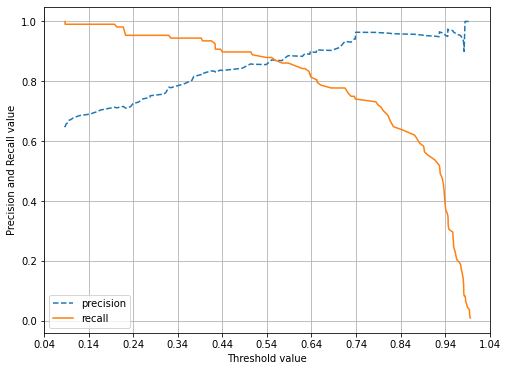

In [227]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend() 
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [228]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , dpredictions)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 1.0000


In [229]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.5f}, 정밀도: {1:.5f}, 재현율: {2:.5f}, F1:{3:.5f}'.format(accuracy, precision, recall, f1))
    print('=======================================')

thresholds = [0.543 , 0.544 , 0.545, 0.546 , 0.547]
pred_proba = lr_clf.predict_proba(X_test)



In [230]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))# x축
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))# y축

max predict_proba: 0.9964315737500711
thresholds[0]: 1.996431573750071
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80]
샘플용 10개의 임곗값:  [2.   0.98 0.95 0.94 0.93 0.8  0.72 0.65 0.59 0.48 0.42 0.32 0.24 0.2
 0.05 0.02 0.  ]
샘플 임곗값별 FPR:  [0.    0.01  0.01  0.021 0.031 0.031 0.062 0.103 0.124 0.186 0.206 0.299
 0.402 0.443 0.66  0.773 0.99 ]
샘플 임곗값별 TPR:  [0.    0.12  0.324 0.407 0.519 0.704 0.759 0.806 0.861 0.898 0.935 0.944
 0.954 0.991 1.    1.    1.   ]


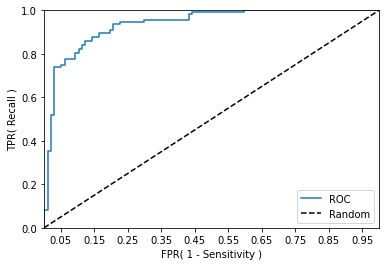

In [231]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [232]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [233]:

lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]


dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)



dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

get_clf_eval(y_test , dt_pred, pred_proba)

DecisionTreeClassifier 정확도: 1.0000
RandomForestClassifier 정확도:1.0000
오차 행렬
[[ 97   0]
 [  0 108]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000,    F1: 1.0000, AUC:0.9360


In [234]:


def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [235]:
thresholds = [0.54 , 0.55 ,0.56,0.57, 0.58 , 0.59 ,0.60]
pred_proba = lr_clf.predict_proba(X_test)


In [236]:

binarizer = Binarizer(threshold=0.54)
pred_th_054 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_054, pred_proba[:, 1])


오차 행렬
[[83 14]
 [13 95]]
정확도: 0.8683, 정밀도: 0.8716, 재현율: 0.8796,    F1: 0.8756, AUC:0.9360
